# Data mining 1st Assignment
<b>Κωνσταντίνος Σκορδούλης 1115201600155

Ευστράτιος Ζωγραφάκης 1115201600049

</b>

Πέρα από τα ερωτήματα 1.2,1.5 (όπου χρειάζεται η πληροφορία του μήνα) , κάνουμε drop τα ακίνητα με το ίδιο id.
Αυτό γιατί υποθέτουμε πως είναι πολύ πιθανό ==> 2 rows σε διαφορετικούς μήνες , με το ίδιο id , μιλάνε για το ίδιο ακίνητο. Δηλαδή μπορεί να "φουσκώσει" τους υπολογισμούς μας με διπλότυπα!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# for info purposes
#listings_cols = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights','month']

In [3]:
train_path = r'./train.csv'
train_df = pd.read_csv(train_path)

train_df.reset_index(drop=True)
train_df

,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,city,...,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,month
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,Athens,...,71,1,294,17,2011-05-20,2019-01-12,96.0,t,strict_14_with_grace_period,1
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,Athens,...,82,1,0,31,2012-10-21,2017-11-23,92.0,t,strict_14_with_grace_period,1
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,Athens,...,47,1,282,27,2012-09-06,2019-02-01,97.0,t,strict_14_with_grace_period,1
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,Athens,...,37,1,286,42,2012-09-24,2019-02-02,97.0,t,strict_14_with_grace_period,1
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,ΑΜΠΕΛΟΚΗΠΟΙ,Athens,...,47,2,308,16,2010-07-08,2019-01-11,95.0,t,strict_14_with_grace_period,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28117,33819692,Lysicrates Monument - Athens 33,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Athina,...,90,2,260,0,2019-04-13,NaN,NaN,t,flexible,3
28118,33820145,Bright and Stylish Exarchia apartment,"Newly renovated, this two bedroom apartment is...",Omonia metro station is 600 m away from the ap...,2019-04-12,NaN,t,f,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,Athina,...,50,2,263,0,2019-04-13,NaN,NaN,t,moderate,3
28119,33821757,Athens21,Athens 21 is centrally located right next to M...,NaN,2019-04-12,NaN,t,f,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Athina,...,200,1,86,0,2019-04-13,NaN,NaN,t,flexible,3
28120,33821833,Tower of Winds,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Athens,...,90,2,260,0,2019-04-13,NaN,NaN,t,flexible,3


# Question 1.1
 The most common room_type

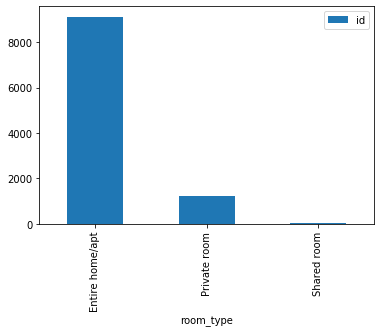

In [4]:
x = train_df.drop_duplicates('id')

x = x[['room_type','id']].groupby('room_type').count()
x.sort_values('id',ascending=False).plot(kind='bar')

# Question 1.2
Δείχνω την πορεία της μέσης τιμής του price στο διάστημα 3 μηνών

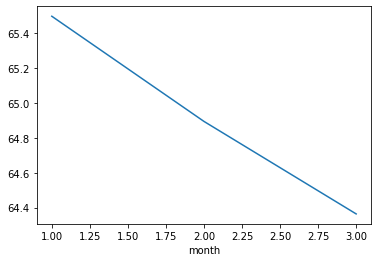

In [5]:
train_df.groupby(['month']).price.mean().plot()

# Question 1.3
Top 5 neighbourhoods with most reviews

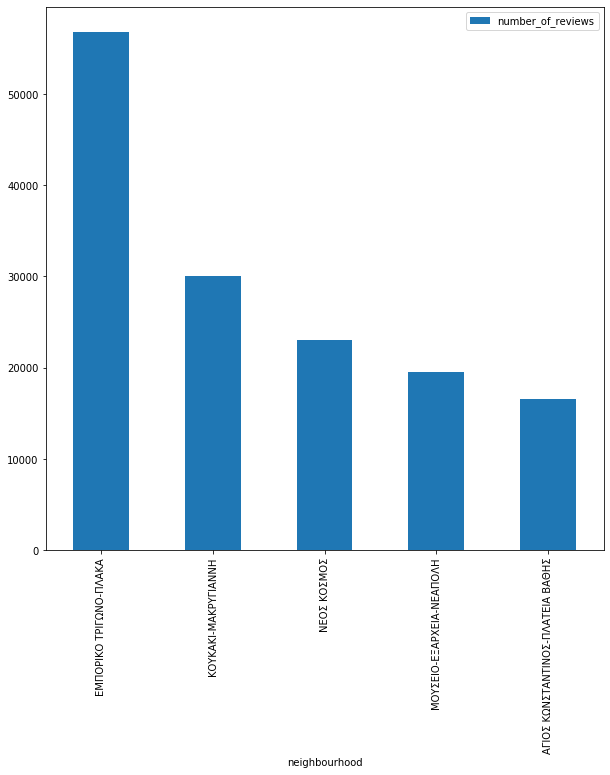

In [6]:
x1 = train_df.drop_duplicates('id')

neighbourhood = x1.groupby('neighbourhood')

df = neighbourhood.sum()

Sorted = df.sort_values(['number_of_reviews'], ascending=False)

x = Sorted.head(5)[['number_of_reviews']]

x.plot(kind='bar',figsize=(10,10))

# Question 1.4

The column id (in the results) is actually the count() of unique ids for the group

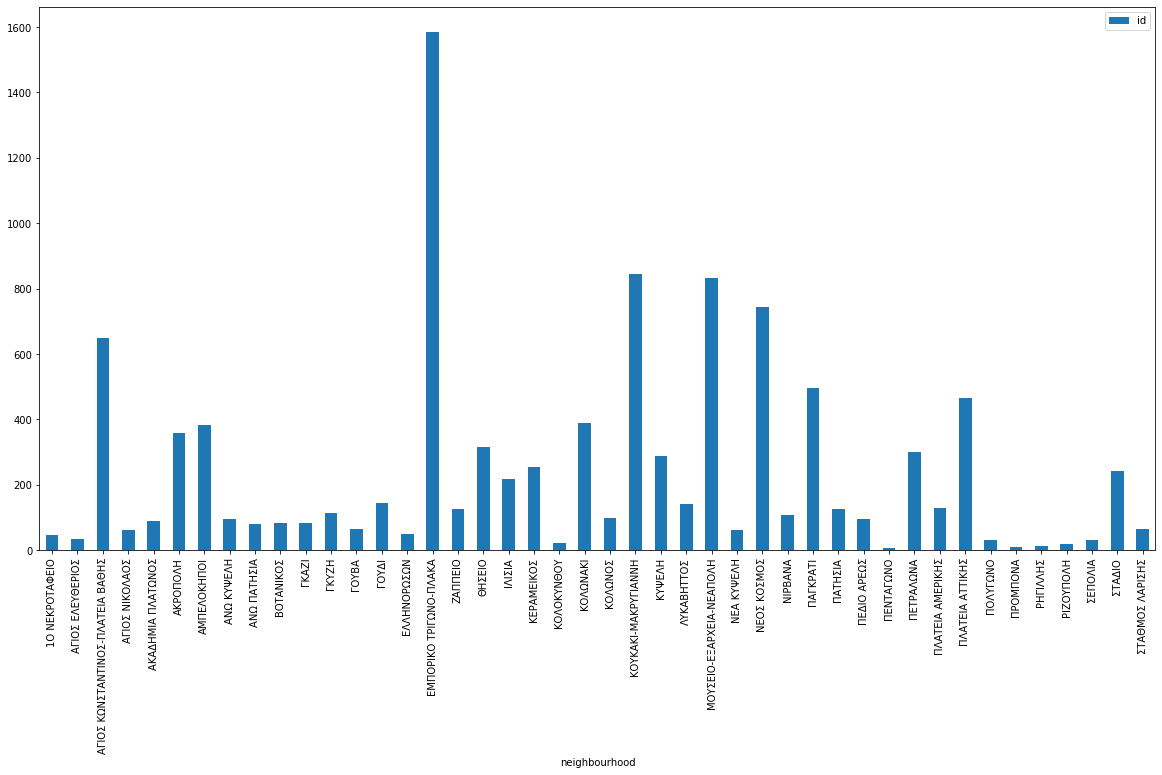

In [7]:
x = train_df[['neighbourhood','id']]
y = x.drop_duplicates(['id'],keep='first')

y1 = y.groupby('neighbourhood').count()
y1.plot(kind='bar',figsize=(20,10))



# Question 1.5

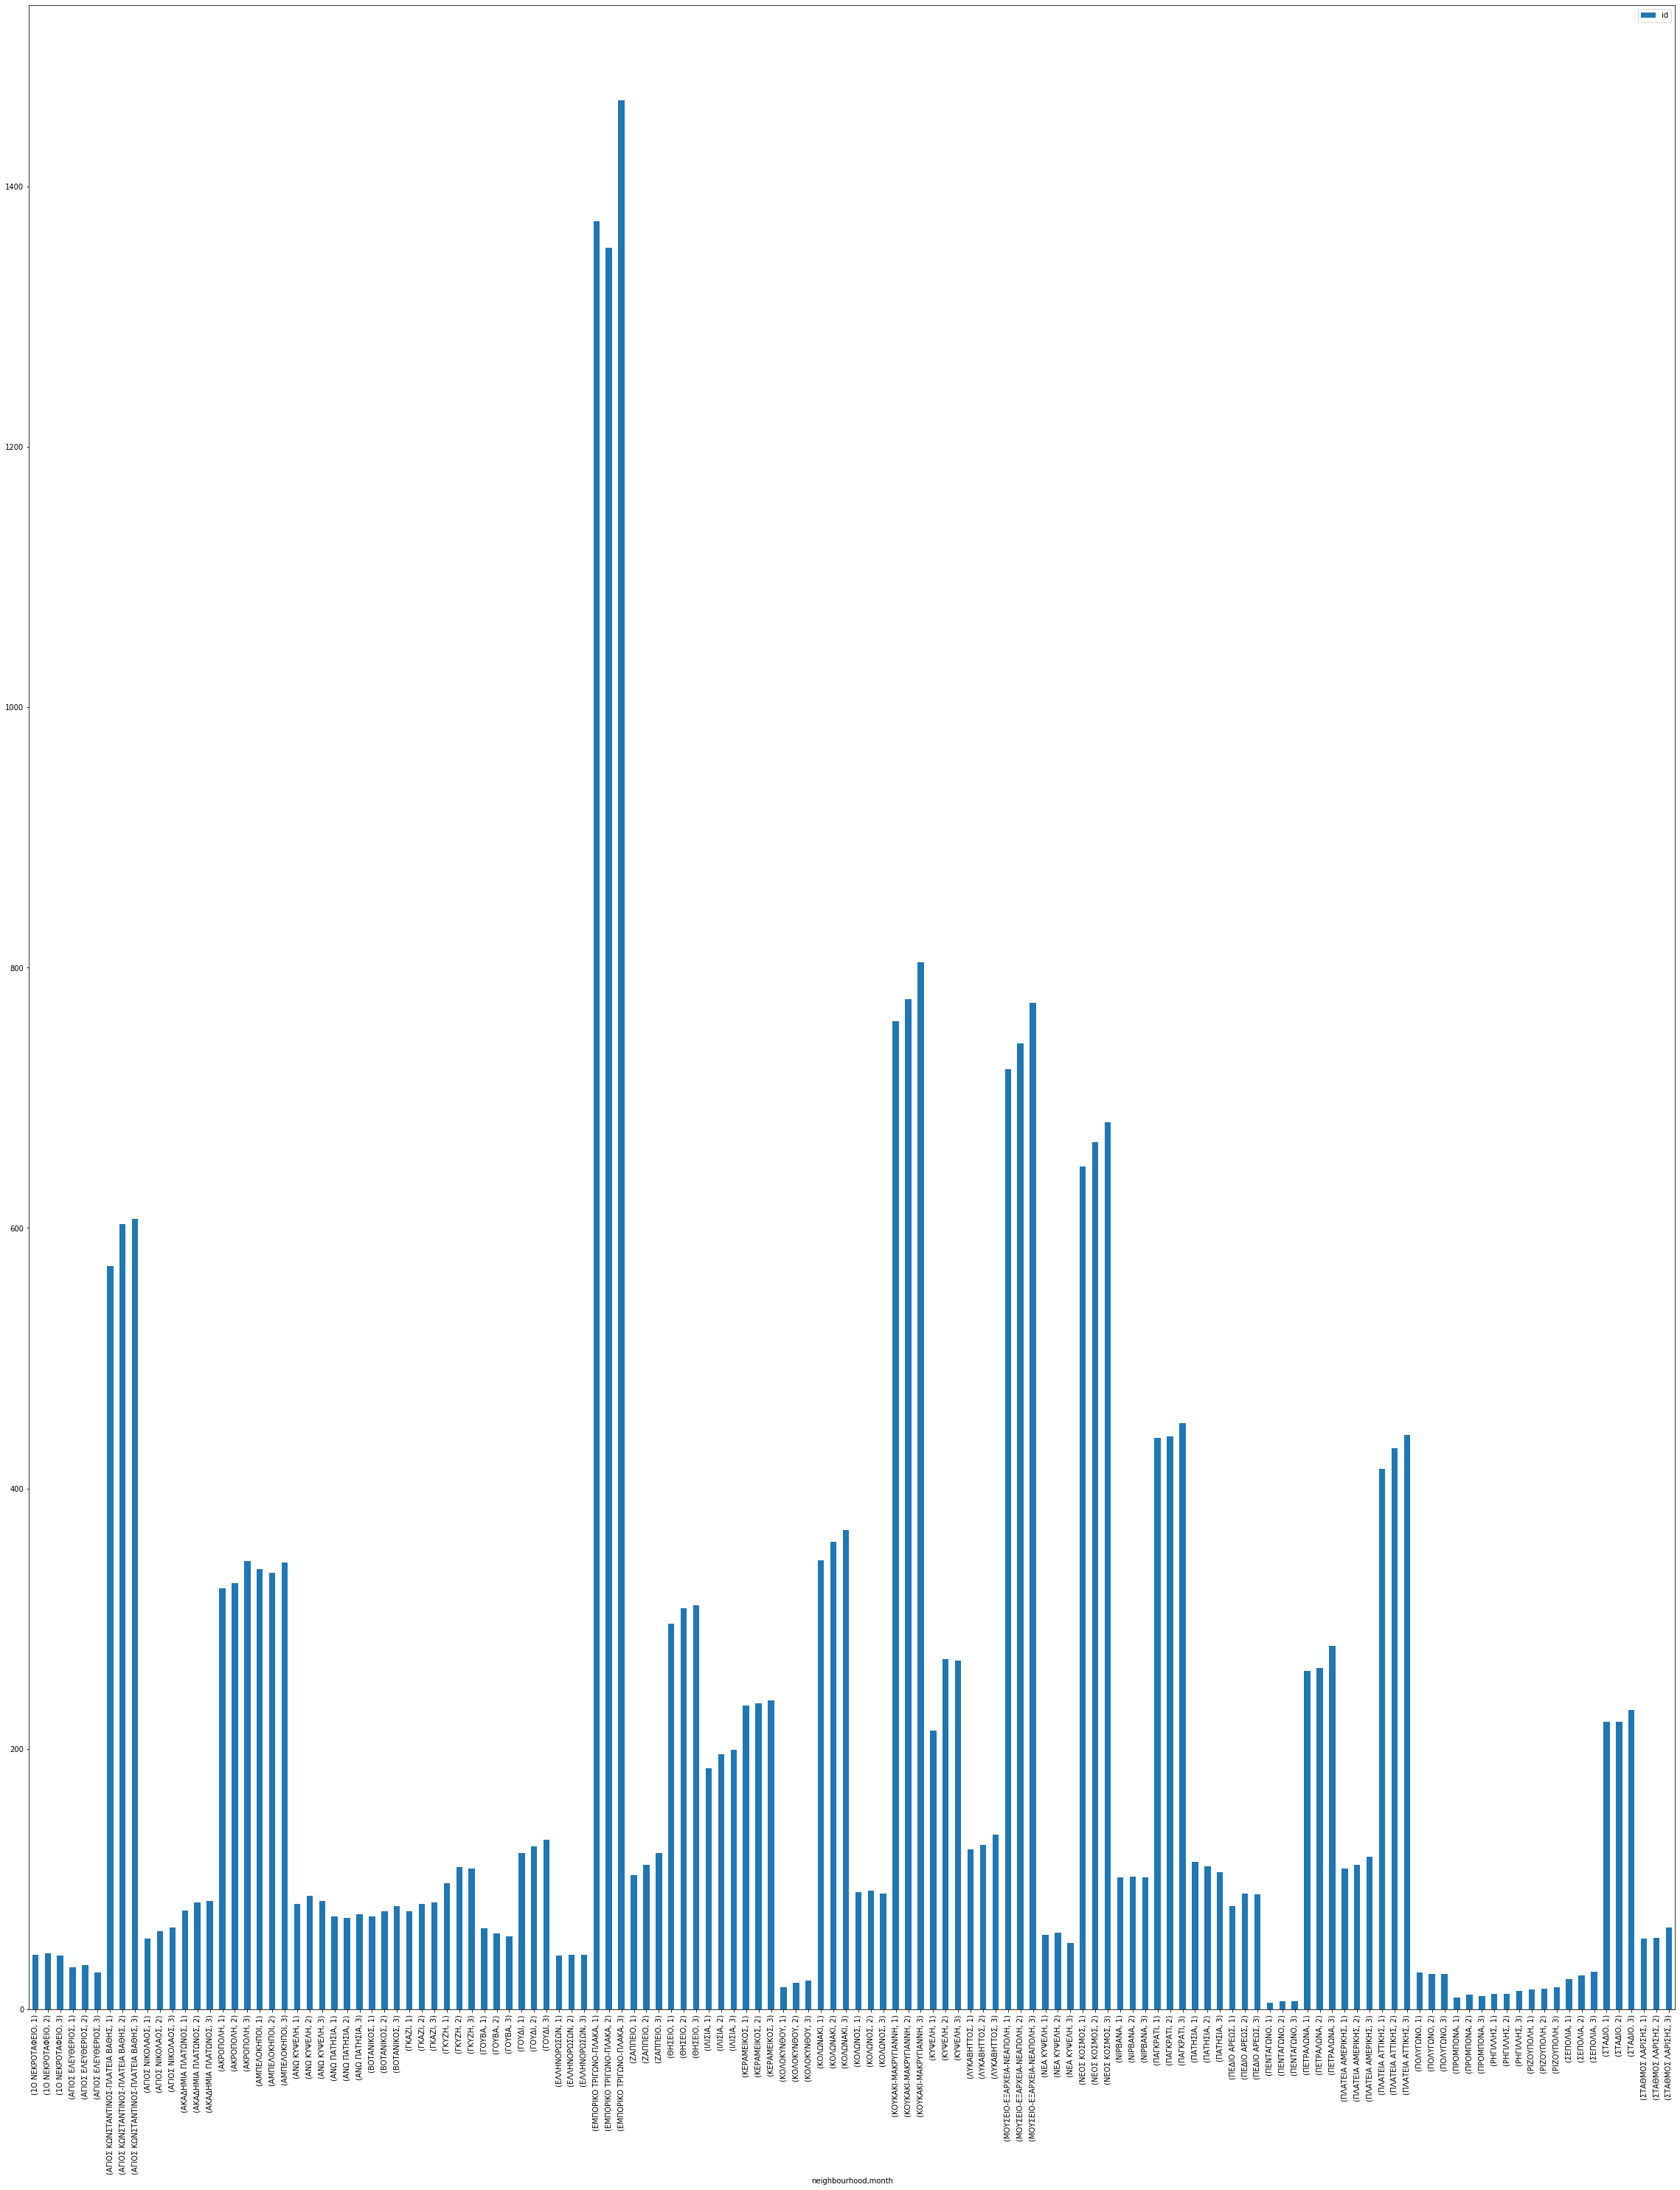

In [8]:
x = train_df[['neighbourhood','month','id']].groupby(['neighbourhood','month']).count()
#x

x.plot(kind='bar',figsize=(40,50))
#x.plot(figsize=(40,50))

# Question 1.6

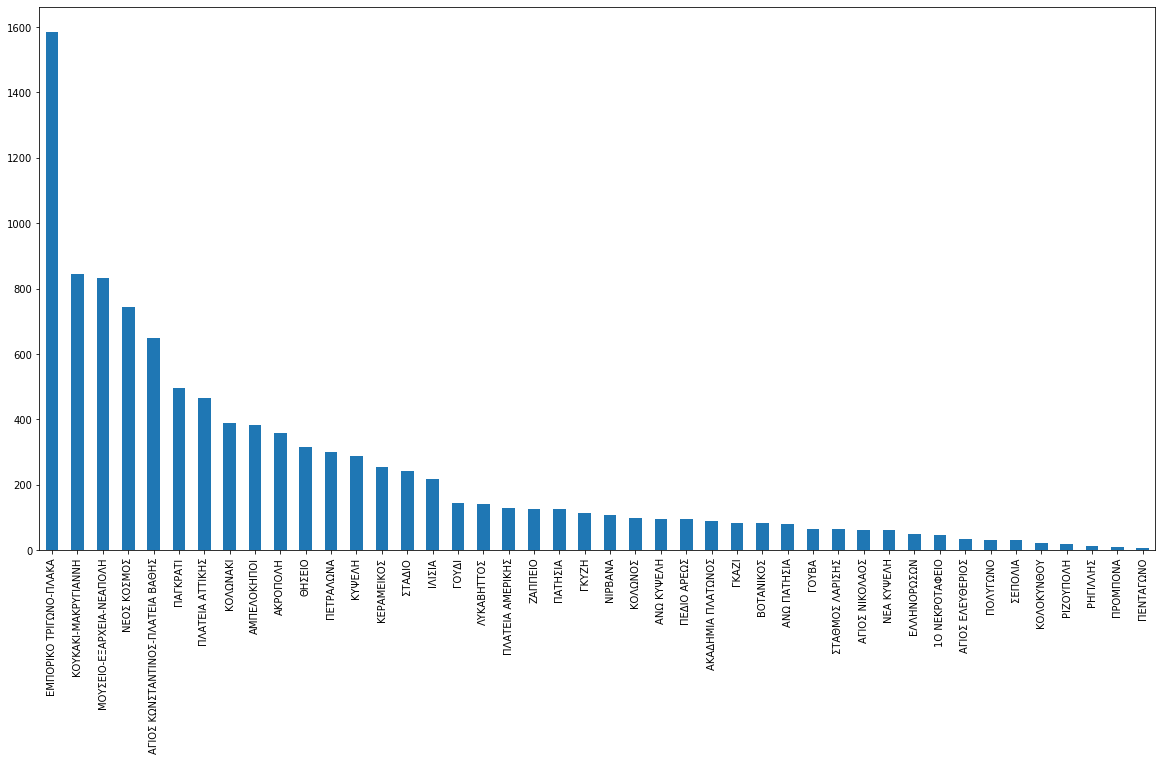

In [9]:
train1 = train_df.drop_duplicates(['id'])
x = train1['neighbourhood'].value_counts().plot(kind='bar',figsize=(20,10)) # hist or bar ==> bar
#x

# Question 1.7

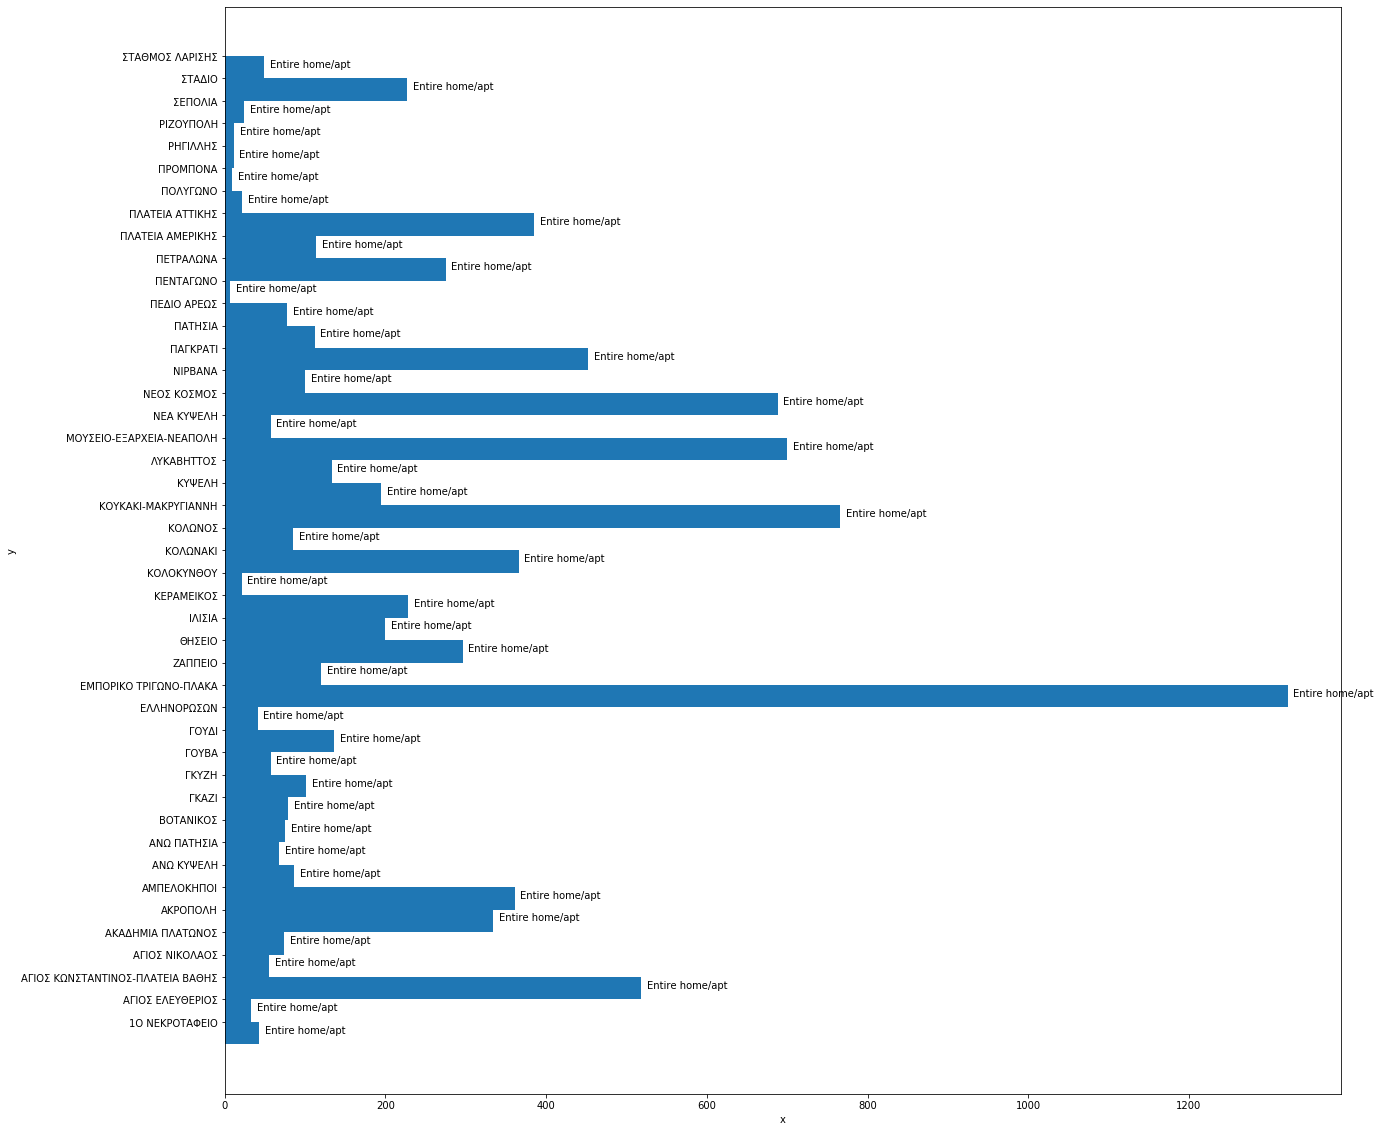

In [10]:
import numpy as np

x = train_df.drop_duplicates('id')

list_val = [] # a list of lists that contain the pairs: [result_type,result_value] 

x = x[['neighbourhood','room_type']].groupby('neighbourhood').agg(lambda x:list_val.append([x.value_counts().index[0],x.value_counts().max()]))

#list_val

list_id = [] # now we break the pairs into 2 different lists
list_value = []

for m in list_val:
        list_value.append(m[1])

for m in x.index:
    list_id.append(m)


f,a = plt.subplots(figsize=(20,20))
index = np.arange(len(list_value))
a.barh(index,list_value,1)

a.set_yticks(index + 1/2)
a.set_yticklabels(list_id,minor=False)

plt.xlabel('x')
plt.ylabel('y')

for i,val in enumerate(list_value):
    a.text(val + 7, i, str(list_val[i][0]) )

plt.show()



# Question 1.8

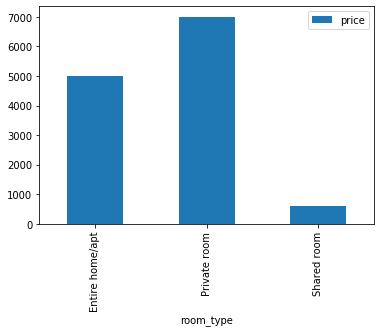

In [11]:
x = train_df.drop_duplicates('id')
x = x[['room_type','price']].groupby('room_type').max()

x.plot(kind='bar')

# Question 1.9 

In [12]:
#listings_cols = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights']

#alist_path = r'./data/april/listings.csv'
#alist_df = pd.read_csv(alist_path,usecols=listings_cols)

In [13]:
#import folium #dont forget save as image

#a = alist_df[['latitude','longitude','room_type','bed_type']]
#m = folium.Map(location=[a.loc[0,'latitude'], a.loc[0,'longitude']])
#for i in range(1000):
#    folium.Marker([a.loc[i,'latitude'], a.loc[i,'longitude']], popup=[a.loc[i,'room_type'],a.loc[i,'bed_type']]).add_to(m)
#m

![title](./folium_map.png)

# Question 1.10

In [14]:
import wordcloud
#from wordcloud import Wordcloud,STOPWORDS

<b>Neighbourhood<b>

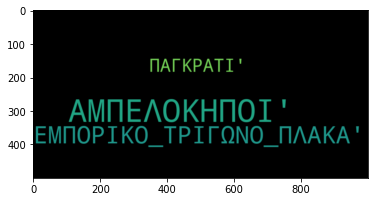

In [15]:
x = train_df.drop_duplicates('id')

x1_temp = x['neighbourhood'].apply(lambda x: x.replace(" ","_").replace("-","_"))
data = x1_temp.values

w1 = wordcloud.WordCloud(width=1000,height=500).generate(str(data))

plt.imshow(w1,interpolation='bilinear')
plt.axis='off'
plt.show()

<b>Transit<b>

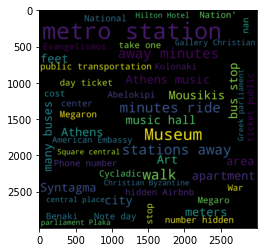

In [16]:
x = train_df.drop_duplicates('id')
data = x.transit.values

w1 = wordcloud.WordCloud(width=3000,height=3000,stopwords = wordcloud.STOPWORDS).generate(str(data))

plt.imshow(w1,interpolation='bilinear')
plt.axis='off'
plt.show()

<b>Description<b>

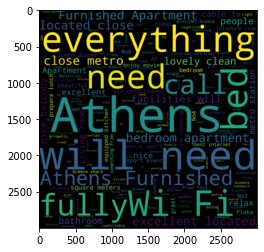

In [17]:
x = train_df.drop_duplicates('id')
data = x.description.values

#excellent,relax,facilities nice,beautiful,great ==> later
#custom_stop = ["Athens","need","fully","will","call","everything","bed","people"]
#custom_stop+= ["excellent","relax","facilities","nice","lovely","beautiful","clean","great"]

#stopwords1 = set(list(wordcloud.STOPWORDS) + custom_stop)
stopwords1 = wordcloud.STOPWORDS

w2 = wordcloud.WordCloud(width=3000,height=3000,stopwords = stopwords1).generate(str(data))

plt.imshow(w2,interpolation='bilinear')
plt.axis='off'
plt.show()

<b>Last review<b>

We need to find the date of "last review" and then find the "review" in reviews.csv

In [18]:
frev_path = r'./data/febrouary/reviews.csv'
frev_df = pd.read_csv(frev_path)

mrev_path = r'./data/march/reviews.csv'
mrev_df = pd.read_csv(mrev_path)

arev_path = r'./data/april/reviews.csv'
arev_df = pd.read_csv(arev_path)

In [19]:
x_df = train_df.drop_duplicates('id')

rows_list = []

for i in x_df.index:

    list_id = x_df.at[i,'id']
    month = int(x_df.at[i,'month'])
    last_review = x_df.at[i,'last_review']
    
    
    if( pd.Series(last_review).isna().item() == True): #ignore
        continue
    
    dict1 = {}
    
    if month == 1:
        
        x_rows = frev_df.loc[ (frev_df.listing_id == list_id ) & (frev_df.date == last_review),'comments']        
        x = str(x_rows.values[0])
        #print(x)
        
        dict1.update({'review':x})
        rows_list.append(dict1)        
        continue
        
        #print(x)
    elif month == 2:
        
        x_rows = mrev_df.loc[ (mrev_df.listing_id == list_id ) & (mrev_df.date == last_review),'comments' ]
        x = str(x_rows.values[0])
        #print(x)
        
        dict1.update({'review':x})
        rows_list.append(dict1)        
        continue        
        
    elif month == 3:
        
        x_rows = arev_df.loc[ (arev_df.listing_id == list_id ) & (arev_df.date == last_review),'comments' ]        
        x = str(x_rows.values[0])
        #print(x)
        
        dict1.update({'review':x})
        rows_list.append(dict1)        
        continue
    
#end of loop

df1_temp = pd.DataFrame(rows_list)
df1_temp    
    
    

,review
0,Το διαμέρισμα ήταν καλύτερο από όσο περίμενα! ...
1,"Sehr gute Unterkunft, sauber und bequem , ist ..."
2,ήταν όλα τελεια
3,I was in town for 1 week for business. Manos p...
4,Φιλόξενος ο οικοδεσπότης και πρόθυμος να μας β...
...,...
7330,The host canceled this reservation 16 days bef...
7331,"The flat was very clean and new, all sanitary ..."
7332,Καλαίσθητος χώρος! Εξαιρετική τοποθεσία πολύ κ...
7333,"Very nice renovated place, nice decoration. Gr..."


Now we load it into the wordcloud

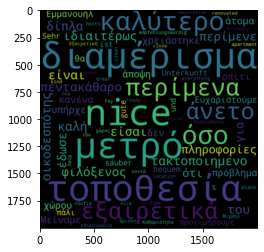

In [20]:
data = df1_temp.review.values

s_list = ['πολύ','ήταν','και','στο','το','οσο','καθώς','σε','από','μας']
stopwords1 = set(list(wordcloud.STOPWORDS) + s_list)

#w1 = wordcloud.WordCloud(width=2000,height=2000,stopwords = wordcloud.STOPWORDS).generate(str(data))
w1 = wordcloud.WordCloud(width=2000,height=2000,stopwords = stopwords1).generate(str(data))

plt.imshow(w1,interpolation='bilinear')
plt.axis='off'
plt.show()

# Question 1.12

1) Ποιο είναι το πιο συχνό <b>bed_type </b> για το μήνα Φεβρουάριο?

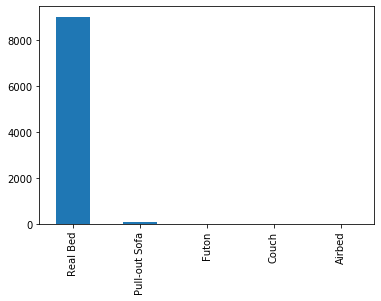

In [21]:
x = train_df[['bed_type','month']]
x = x.loc[ x.month == 1]

x['bed_type'].value_counts().plot(kind='bar')

2) Για τα δεδομένα μας , τα περισσότερα ακίνητα είναι <b> instant_bookable </b> ή οχι?

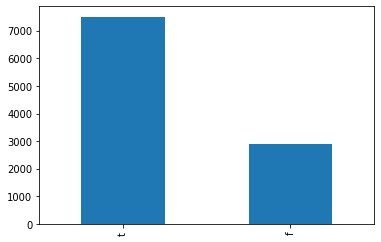

In [22]:
x = train_df.drop_duplicates('id')
x['instant_bookable'].value_counts().plot(kind='bar')

#  

# PART 2

In [23]:
new_df = train_df[['id','name','description']]

#drop duplicate rows ==> duplicate ids
new_df = new_df.drop_duplicates(['id'],keep='first')
#new_df.to_csv(r'./newdf.csv')

We need to the 'description' wordcloud but with <b>extra</b> STOPWORDS

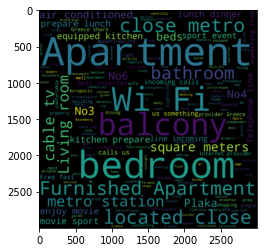

In [24]:
data = new_df.description.values

#excellent,relax,facilities nice,beautiful,great
custom_stop = ["Athens","need","fully","will","call","everything","bed","people"]
custom_stop+= ["excellent","relax","facilities","nice","lovely","beautiful","clean","great"]

stopwords1 = set(list(wordcloud.STOPWORDS) + custom_stop)

w2 = wordcloud.WordCloud(width=3000,height=3000,stopwords = stopwords1).generate(str(data))
plt.imshow(w2,interpolation='bilinear')
plt.axis='off'
plt.show()

Maybe check name?

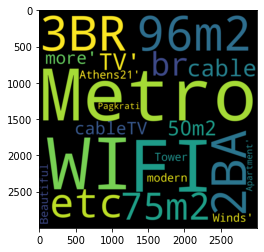

In [25]:
data = new_df.name.values

#stopwords1 = set(list(wordcloud.STOPWORDS) + custom_stop)

#temp_stop = [descriptio]

w3 = wordcloud.WordCloud(width=3000,height=3000,stopwords = wordcloud.STOPWORDS).generate(str(data))
plt.imshow(w3,interpolation='bilinear')
plt.axis='off'
plt.show()

Creating the new column

In [26]:
new_df['new'] = new_df['name'] + new_df['description']
#new_df['new'].isna().any()

new_df['new'] = new_df['new'].fillna("NULL")

new_df = new_df.reset_index(drop=True)

In [27]:
#len(new_df.index)
new_df

,id,name,description,new
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,"96m2, 3BR, 2BA, Metro, WI-FI etc...Athens Furn..."
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,"75m2, 2-br, metro, wi-fi, cable TVAthens Furni..."
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,"50m2, Metro, WI-FI, cableTV, moreAthens Furnis..."
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,"Studio, metro, cable tv, wi-fi, etcThe Studio ..."
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,"47m2, close to metro,cable TV,wi-fiAQA No2 is ..."
...,...,...,...,...
10380,33819692,Lysicrates Monument - Athens 33,"""Athens 33"" is a newly renovated building in N...","Lysicrates Monument - Athens 33""Athens 33"" is ..."
10381,33820145,Bright and Stylish Exarchia apartment,"Newly renovated, this two bedroom apartment is...",Bright and Stylish Exarchia apartmentNewly ren...
10382,33821757,Athens21,Athens 21 is centrally located right next to M...,Athens21Athens 21 is centrally located right n...
10383,33821833,Tower of Winds,"""Athens 33"" is a newly renovated building in N...","Tower of Winds""Athens 33"" is a newly renovated..."


# TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
custom_stop = ["Athens","need","fully","will","call","everything","bed","people"]
custom_stop+= ["excellent","relax","facilities","nice","lovely","beautiful","clean","great"]

stopwords2 = list(wordcloud.STOPWORDS) + custom_stop

Creating our Tfidfvectorizer, with stopword but max_features=12500 ( We don't have 64,4 Gb RAM)

In [30]:
#tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words=stopwords2)

tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words=stopwords2,max_features=12500)

Create the tfidf array

In [31]:
x1 = tfidf.fit_transform(new_df['new'])
#x_array = x.toarray()
#x_array

C:\Users\kostantinos\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'athens', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [32]:
#Ignore the PCA "compression" ==> it worsens the score later ==> ( everything was 1.0000 , all 100 best items)

#from sklearn.decomposition import PCA
#x = x1.todense()
#x_array = PCA(n_components=2).fit_transform(x)

In [33]:
#x_array.shape

Now for the <b>Cosine Similarity</b>

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

result_array = cosine_similarity(x1)

#result_array = cosine_similarity(x_array)

#result_array.shape
result_array



array([[1.        , 0.58864965, 0.61155689, ..., 0.05449947, 0.01472616,
        0.01157437],
       [0.58864965, 1.        , 0.65384694, ..., 0.04755755, 0.00826647,
        0.01091183],
       [0.61155689, 0.65384694, 1.        , ..., 0.05203793, 0.00904525,
        0.01193983],
       ...,
       [0.05449947, 0.04755755, 0.05203793, ..., 1.        , 0.02582734,
        0.        ],
       [0.01472616, 0.00826647, 0.00904525, ..., 0.02582734, 1.        ,
        0.        ],
       [0.01157437, 0.01091183, 0.01193983, ..., 0.        , 0.        ,
        1.        ]])

In [35]:
result_array.shape

(10385, 10385)

Creating our dictionary.
We use <b>np.argsort</b> which gives us the <b>indices<\b> of the unordered list (as ordered list)

For example argsort([c,b,a]) gives back [3,2,1] (the indices) ==> [a,b,c]

We use argsort for each of the items of np.array ==>  result_array

Result_array[i] contains the similarity of i-th item (of new_df) with the rest ==> pairwise.


    
 

In [36]:
import numpy as np

dictionary = {}
for i in range(0,len(result_array)):
    
    list_id = new_df.at[i,'id']
    
    sim = result_array[i]
    
    indices = list(np.argsort(sim))
    want_i = indices[-1:-102:-1] #take the last 101 indices
    
    
    if i in want_i:
        want_i.remove(i) #not ourselves 
    else:
        want_i.pop() #pop the last one
    
    list1 = []
    for j in want_i: # create the list of lists
        
        list_id1 = new_df.at[j,'id']
        
        list1.append([list_id1,sim[j]])
    
    dictionary.update({list_id:list1})
        
#done cosine similarity ==> need recommend and BigramCollocationFinder


Now for the <b>Recommendation</b>

In [37]:
# global vars: dictionary = {item_id: list of 100 similar items}
#              new_df = our dataframe


def recommend(item_id,num):
    
    if num not in range(0,101) : # num not in
        print("Error")
        return False
    
    if item_id not in dictionary: # num not in
        print("Error1")
        return False
    
    item_name = new_df.loc[ item_id == new_df.id, 'name']
    item_name = str(item_name.values[0])
    
    want_list = dictionary[item_id][:num] # get the first num values
    
    print("Recommending %d listing similar to %s"%(num,item_name))
    print("------------------------------------------------------")
    
    for x in want_list:
        list_id1 = x[0]
        
        item_name1 = new_df.loc[ list_id1 == new_df.id,'name']
        item_name1 = str(item_name1.values[0])
        
        item_description1 = new_df.loc[ list_id1 == new_df.id,'description']
        item_description1 = str(item_description1.values[0])
        
        score = x[1]
        
        print("Recommended:%s"%(item_name1))
        print("Description:%s"%(item_description1))
        print("Score:%f"%(score))
        print("\n")

    #end of loop

#main
recommend(10595,100)
    
        
        
        
        
    

Recommending 100 listing similar to 96m2, 3BR, 2BA, Metro, WI-FI etc...
------------------------------------------------------
Recommended:50m2, Metro, WI-FI, cableTV, more
Description:Athens Furnished Apartment No3 is 1-bedroom apartment (50 square meters)  -excellent located  -close to metro station,  -lovely,  -very clean  with all the facilities that you will need, nice balcony, excellent Wi-Fi, cable tv, fully air conditioned… Athens Furnished Apartment No3 is an excellent located, close to metro, lovely, very clean 1-bedroom apartment (50 square meters) with all the facilities that you will need and a very nice balcony facing the inner garden to enjoy your breakfast in the morning or relax in the evening. Fully equipped kitchen with everything you need to prepare your lunch/dinner. Nice Living room to relax and enjoy a movie or a sport event. Clean nice bathroom. For more than 2 people there is a great double sofa/bed in the living room. Apartment No3 has everything you will need

# Bigram Collocation Finder

We take the concated column of new_df and turn it into a big sentence (string).

Then we tokenize the sentence ==> word_tokenize()

Last but not least, we create bcf from our "words" and find the top 10 most "likely" to be together ==> we compute likelihood_ratio

In [38]:
import nltk
from nltk.metrics import BigramAssocMeasures

#nltk.download('punkt') #download this if an error shows up

#new_df['token_new'] = new_df['new'].apply(word_tokenize)

big_sentence = ' '.join(new_df.new)
#big_sentence

tokens_list = nltk.word_tokenize(big_sentence)
words = [ w.lower() for w in tokens_list]

bcf = nltk.collocations.BigramCollocationFinder.from_words(words)

#bcf.nbest(BigramAssocMeasures.pmi,10)
bcf.nbest(BigramAssocMeasures.likelihood_ratio,10)

[('living', 'room'),
 ('of', 'athens'),
 ('metro', 'station'),
 ('fully', 'equipped'),
 ('in', 'the'),
 ('walking', 'distance'),
 ('heart', 'of'),
 ('double', 'bed'),
 ('you', 'can'),
 ('.', 'it')]